---
title: "US Treasury Par Inverted Yield Curve Analysis"
author: "Samantha Pang"
date: "Oct 2025"
---

### Prereq!
Libraries needed:

* pandas
* seaborn
* matplotlib
* plotly

### ETL Web Scraped Data from US Treasury
Data was scraped from [US Treasury's Resource Center](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=2024) using BeautifulSoup and Requests, see previous analysis for full ETL code.

### Trends Over Time

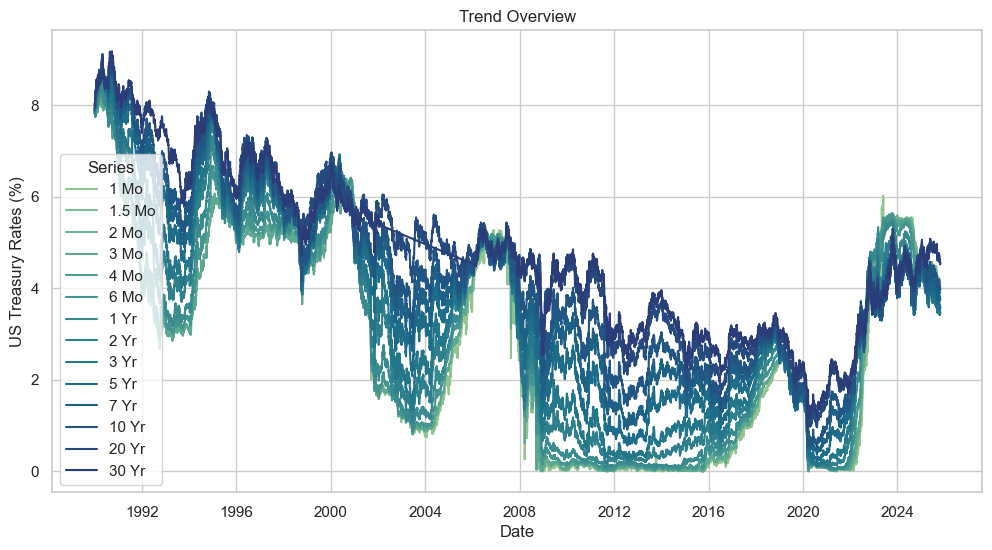

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

clean_df = pd.read_csv('clean_US_Treasury_Rates.csv')
clean_df['Date'] = pd.to_datetime(clean_df['Date'])
data = clean_df.melt(id_vars='Date', var_name='Series', value_name='Value')
data.dropna(inplace=True)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Value', hue='Series', palette='crest')
plt.title("Trend Overview")
plt.ylabel("US Treasury Rates (%)")
plt.show()

The line chart shows the trends of different maturity rates from 1990 to 2025 are generally trending down. Unexpected upward spikes starting around 2021, likely due to economic recovery post-pandemic.

Moreover, the short-term rates (light blue lines) are more volatile, while the long-term rates (dark blue lines) are more stable. There are a few periods that the short-term rates spike above the long-term rates, indicating an inverted yield curve.

## Inverted Yield Curve

"When short-term rates are higher than long-term rates."

Economists use the yield curve, which compares the interest rates difference bweteen "10-year and 3-month" or "10-year and 2-year" treasury rate, to determine if short-term investments are more profitable than long-term ones. When the yield curve inverts and the difference drops below zero, it serves as a warning sign of an impending recession.

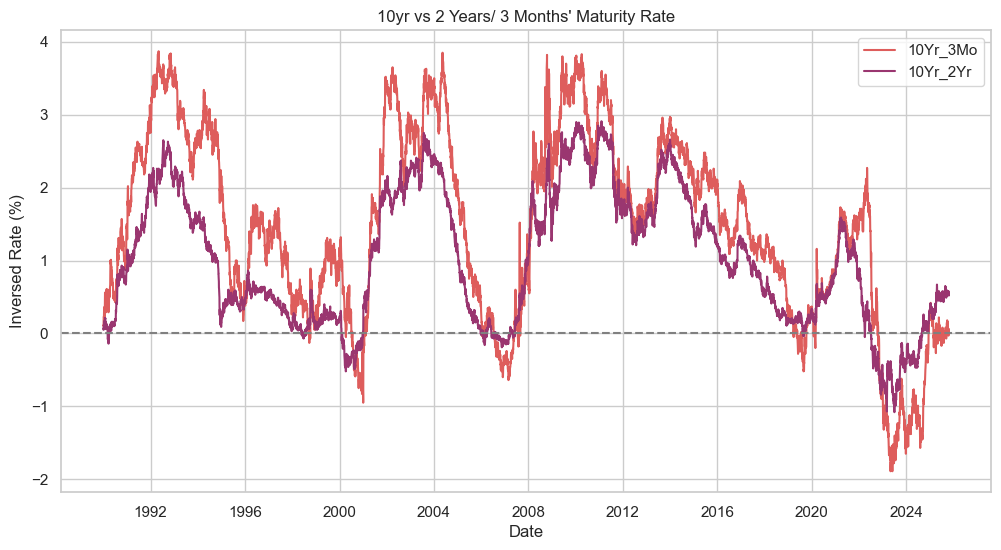

In [15]:
#calculate the inversed rate
clean_df['10Yr_3Mo'] = clean_df['10 Yr']-clean_df['3 Mo']
clean_df['10Yr_2Yr'] = clean_df['10 Yr']-clean_df['2 Yr']

data = clean_df.melt(id_vars='Date', var_name='Series', value_name='Value')
data = data[data['Series'].isin(['10Yr_3Mo', '10Yr_2Yr'])]
data.dropna(inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Value', hue='Series', palette='flare')
plt.title("10yr vs 2 Years/ 3 Months' Maturity Rate")
plt.ylabel("Inversed Rate (%)")
plt.legend(loc="upper right")
plt.axhline(y=0, color='grey',linestyle='--')
plt.show()

The assumption of recession is supported by the last 30 years of invasion occurrences.
Recession happened in early 2000 (dot-com bubble), 2007-2009 (housing bubble), and 2020 (pendemic). The 3 recessions mentioned experienced a decrease below 0.

Unusual Trend Observed between 2022-2024 with significant inverted rates. Let's take a closer look using interactive visualization via Plotly.

In [26]:
import plotly.express as px

fig = px.line(
    data,
    x='Date',
    y='Value',
    color='Series',
    title="10yr vs 2 Years/3 Months' Maturity Rate",
    color_discrete_sequence=px.colors.sequential.Rainbow_r
)

fig.add_hline(y=0, line_dash='dash', line_color='gray')

# Improve layout and interactivity
fig.update_layout(
    width=1000,
    height=700,
    yaxis_title="Inversed Rate (%)",
    # legend_title="Series",
    hovermode="x unified",
    template="plotly_white",
)

# Add range slider and zoom buttons for date axis
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=5, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_xaxes(range=[data['Date'].max() - pd.DateOffset(years=5), data['Date'].max()])
fig.show()


Huge inversions happened between 2022-2024, with the spread dropping well below zero throughout the years. This trend heightened concerns about future economic growth. The spread is trending upwards and above zero starting in early 2025, indicating a potential economic recovery. 

### Conclusion
The U.S. Treasury Par Yield Curve Rates have shown a general downward trend over the past few decades, with notable volatility in short-term rates. The occurrence of inverted yield curves has historically been a precursor to recessions, highlighting the importance of monitoring these rates for economic forecasting. As of October 2025, we are seeing yield curve returning to normal after the recent inversion. Nonetheless, this has continued raised concerns over potential recession risks.


<!-- ### Conclusion
to do list 
- make interactive plot with plotly for biplot
- write conclusion
- quarto website
- deploy to github pages
- how to make it look cute? -->
